# MNIST Classification Using *Convolutional Neural Network*
---
- Author: Vladimir Shapiro, adopted from Diego Inácio's
- Notebook: [MNIST_classification.ipynb](https://github.com/diegoinacio/computer-vision-notebooks/blob/master/Computer-Vision-Experiments/MNIST_classification.ipynb)
---
Digit classification using *Convolutional Neural Network*.

In [23]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

import tensorflow as tf

## Read the dataset
---

In [24]:
mnist = tf.keras.datasets.mnist
[X_train, Y_train],[X_test, Y_test] = mnist.load_data()
X_train = X_train[..., None]
X_test = X_test[..., None]

# one hot for multi-class classification
# MNIST = 10 classes [0-9]
Y_train_oh = np.zeros((Y_train.size, 10))
Y_train_oh[np.arange(Y_train.size), Y_train] = 1
Y_test_oh = np.zeros((Y_test.size, 10))
Y_test_oh[np.arange(Y_test.size), Y_test] = 1

print('X_train:', X_train.shape)
print('Y_train:', Y_train.shape)
print('Y_train_oh:', Y_train_oh.shape)
print('X_test:', X_test.shape)
print('Y_test:', Y_test.shape)
print('Y_test_oh:', Y_test_oh.shape)

X_train: (60000, 28, 28, 1)
Y_train: (60000,)
Y_train_oh: (60000, 10)
X_test: (10000, 28, 28, 1)
Y_test: (10000,)
Y_test_oh: (10000, 10)


Display several randomly selected handwritten digits to provide a raw impression how the digits look like.

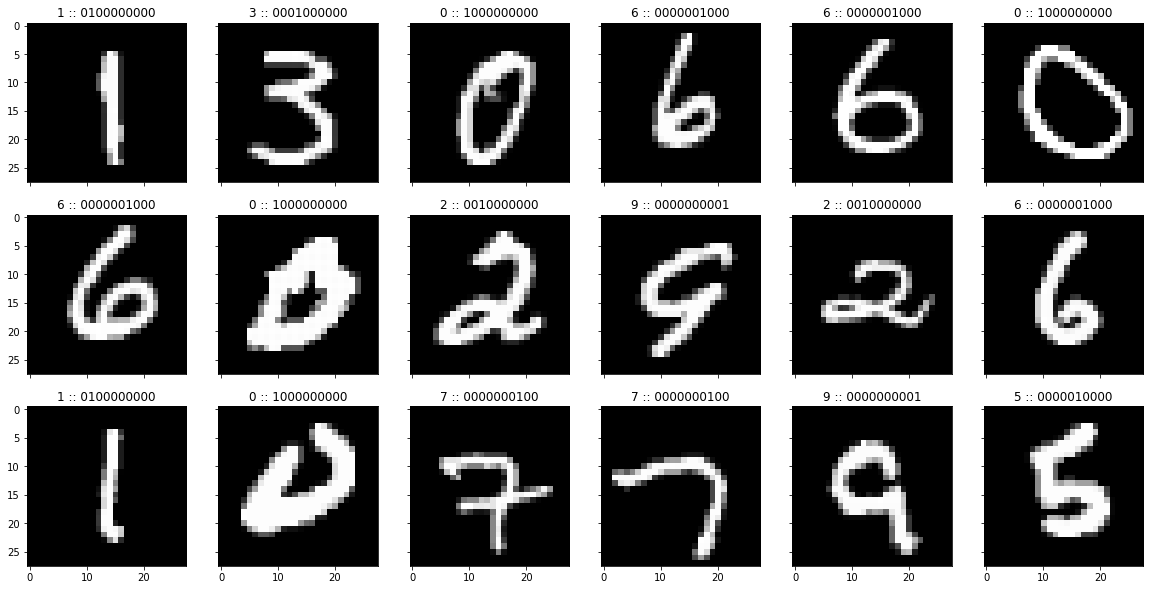

In [25]:
plt.rcParams['figure.figsize'] = (20, 10)
fig, AX = plt.subplots(3, 6, sharex=True, sharey=True)

np.random.seed(1234)
for ax in AX.ravel():
    rindex = np.random.randint(Y_train.size)
    img_show = X_train[rindex][...,0]
    ax.imshow(img_show, cmap='gray')
    # title label + one-hot
    title = f'{Y_train[rindex]} :: '
    title += ''.join([str(int(e)) for e in Y_train_oh[rindex]]) 
    ax.set_title(title)
plt.grid(False)

## Transform dataset
---

To a format suitable for the training and predictions later on. A separate *X_test* dataset is allocated.

In [26]:
# Change dtype to float32
X_train = X_train.astype(np.float32)
Y_train = Y_train.astype(np.float32)
X_test = X_test.astype(np.float32)
Y_test = Y_test.astype(np.float32)

# Change axes and normalization
X_train, Y_train = X_train/255, Y_train.reshape(-1, 1)
X_test, Y_test = X_test/255, Y_test.reshape(-1, 1)

# reshape Xs
x_train = X_train.reshape(-1, 28*28)
x_test = X_test.reshape(-1, 28*28)

print('X_train:', X_train.shape)
print('x_train:', x_train.shape)
print('Y_train:', Y_train.shape)
print('Y_train_oh:', Y_train_oh.shape)
print('X_test:', X_test.shape)
print('x_test:', x_test.shape)
print('Y_test:', Y_test.shape)
print('Y_test_oh:', Y_test_oh.shape)

X_train: (60000, 28, 28, 1)
x_train: (60000, 784)
Y_train: (60000, 1)
Y_train_oh: (60000, 10)
X_test: (10000, 28, 28, 1)
x_test: (10000, 784)
Y_test: (10000, 1)
Y_test_oh: (10000, 10)


# Classification using *Convolutional Neural Network (CNN)*
---

## Training

Create Keras' Sequential CNN model, which is appropriate for a plain stack of layers where each layer has exactly one input tensor and one output tensor.

First, define the *structure* or *architecture* of the CNN model:

In [27]:
# Get dimensions
N1, N2, C = X_train[0].shape

# Model
modelCNN = tf.keras.Sequential([
    tf.keras.layers.Input(X_train[0].shape),
    tf.keras.layers.Conv2D(32, 3, activation='relu'),
    tf.keras.layers.Conv2D(64, 3, activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=2),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(N1*N2, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(10, activation='softmax')
])

modelCNN.summary() # Display the structure

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 12, 12, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 9216)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 784)               7226128   
_________________________________________________________________
dropout_3 (Dropout)          (None, 784)              

Now, *build* the actual model, that is allocate computer memory, connections, hyperparameters, etc. per definitions above.

In [28]:
modelCNN.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

Begin the CNN training for a given number of epochs. 
    
    Tip: Training on a conventional CPU is significantly slower than on GPU/TPU. To request that go to "Runtime" -> "Change Runtime Type" and select "GPU" from the dropdown list prior to running the script.

In [29]:
NUMBER_OF_EPOCHS = 10
modelCNN.fit(X_train, Y_train_oh, epochs=NUMBER_OF_EPOCHS)

Epoch 1/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2554 - accuracy: 0.9207
Epoch 2/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0553 - accuracy: 0.9830
Epoch 3/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0385 - accuracy: 0.9882
Epoch 4/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0316 - accuracy: 0.9902
Epoch 5/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0199 - accuracy: 0.9937
Epoch 6/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0171 - accuracy: 0.9943
Epoch 7/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0155 - accuracy: 0.9951
Epoch 8/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0130 - accuracy: 0.9959
Epoch 9/10
1875/1875 [==============================] - 8s 5ms/step - loss: 0.0122 - accuracy: 0.9960
Epoch 10/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.010

## Testing

Now, we have the trained model and can do predictions.

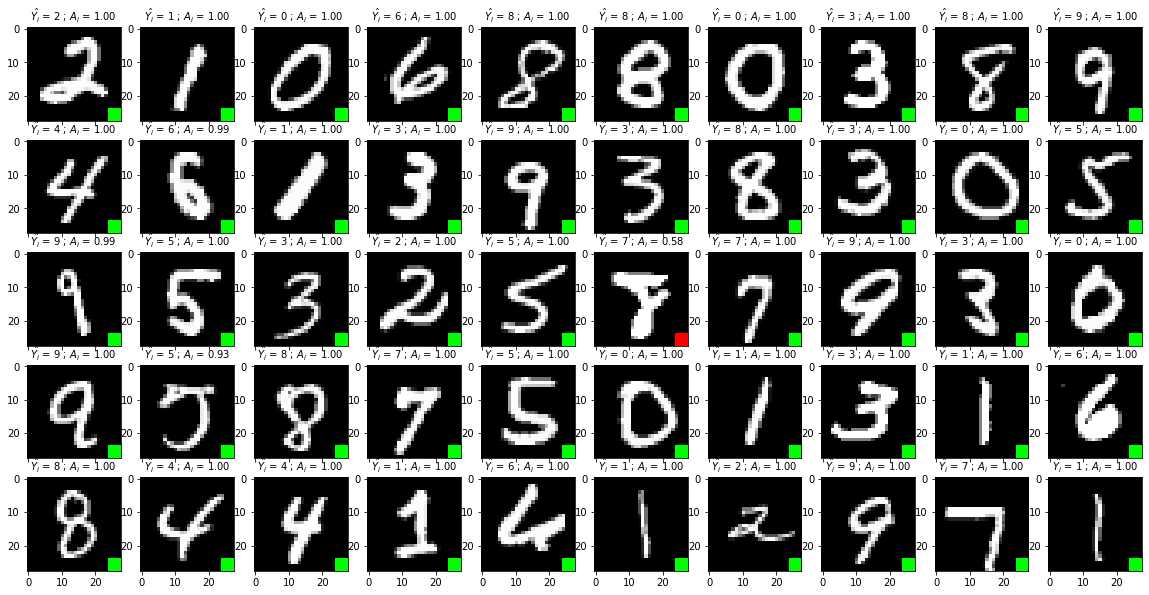

In [32]:
fig, AX = plt.subplots(5, 10, sharex=True)
AX = [b for a in AX for b in a]

prediction_on_test = modelCNN.predict(X_test)

np.random.seed(1234)
for ax in AX:
    index = np.random.randint(Y_test.size)
    # Predict
    A_ = prediction_on_test[index]
    Y_ = np.argmax(A_)
    # Prepare image to show
    img_show = np.ones((N1, N2, 3))
    img_show *= X_test[index]
    # Green square: classified correctly
    # Red square: classified wrongly
    if Y_ == Y_test[index]:
        img_show[-4:, -4:] = (0, 1, 0)
    else:
        img_show[-4:, -4:] = (1, 0, 0)
    ax.imshow(img_show)
    ax.set_title(r'$\hat{Y_i}$ = ' + str(Y_) + r' ; $A_i$ = {:.02f}'.format(float(A_[Y_])), fontsize=10)

Calculate a validation metric as:

In [33]:
print('Validation')
#prediction_on_test = modelCNN.predict(X_test)
print('Test:', np.sum((Y_test_oh - prediction_on_test)**2, axis=1).mean())

prediction_on_train = modelCNN.predict(X_train)
print('Train:', np.sum((Y_train_oh - prediction_on_train)**2, axis=1).mean())

Validation
Test: 0.012252910720814934
Train: 0.0006563276717003561
